In [46]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)
import mpl_toolkits.basemap as bmp
import matplotlib.pyplot as plt
import csv

Populating the interactive namespace from numpy and matplotlib


In [39]:
m = bmp.Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
plt.figure(figsize=(19,20))

In [87]:
lon = []
lat = []
rad = []
seen = dict()
with open('data/raw_calc_lat_lon.csv', 'r') as csvfile:
    tab = csv.reader(csvfile, delimiter=',')
    for row in tab:
        if row[1] != 'latitude':
            if row[0] not in seen:
                lat.append(float(row[1]))
                lon.append(float(row[2]))
                rad.append(float(row[3]) * 45)
                seen[row[0]] = True

In [78]:
# Number of tweets
opacity = [389, 15, 334, 51, 739, 329, 86, 8, 0, 453, 339, 31, 47, 73, 302, 206, 71, 91, 22, 8, 298,
           39, 9, 8, 30, 90, 10, 2, 5, 38, 122, 95, 96, 322, 0, 310, 140, 8, 62, 42, 123, 2, 164, 736, 65, 9,
           54, 13, 22, 97, 2,]

In [84]:
colors = np.zeros((51,4))
colors[:,2] = 1.0
colors[:,3] = np.array(opacity)/(2*float((max(opacity)))) + 0.5

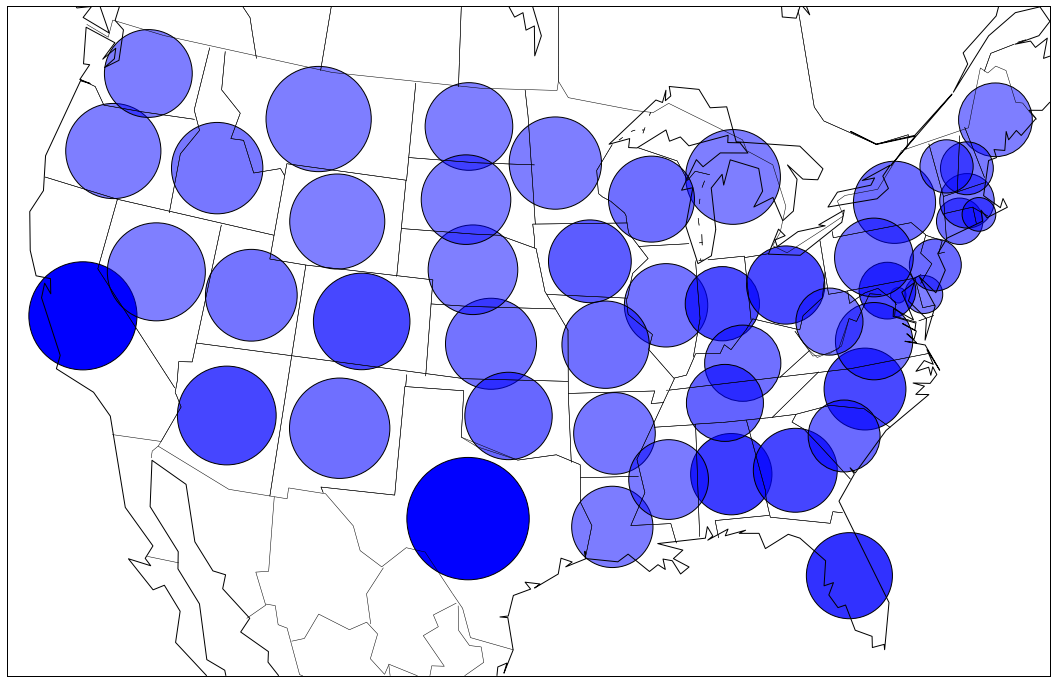

In [209]:
m.drawcoastlines(color='black')
m.drawstates(color='black')
m.drawcountries(color='black')
m.drawmapboundary(fill_color='white')

m.scatter(lon, lat, latlon=True, s=rad, c=colors)
plt.show()

In [88]:
plt.figure(figsize=(19,20))

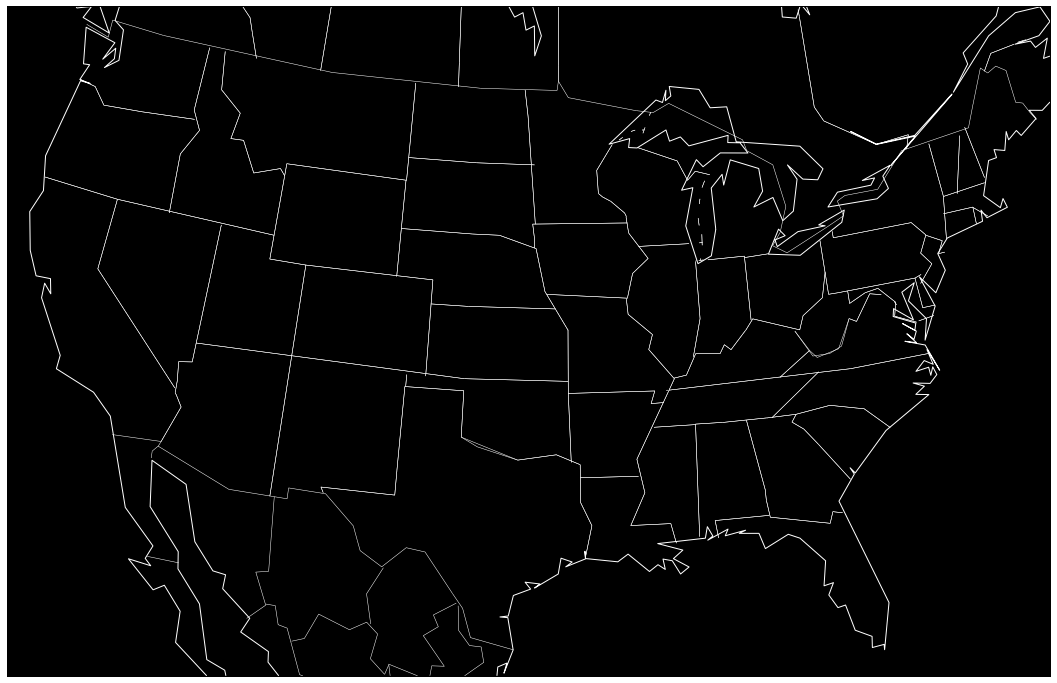

In [89]:
m.drawcoastlines(color='white')
m.drawstates(color='white')
m.drawcountries(color='white')
m.drawmapboundary(fill_color='black')

In [98]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


In [161]:
import pandas as pd

In [162]:
df = pd.DataFrame.from_csv('data/other/us_map_info.csv')

In [163]:
df[df['state'] == 'California']


,state,candidate,predicted_votes_received,actual_votes_received
ix,,,,
0,California,Bernie Sanders,1670700,1502043
1,California,Donald Trump,577035,1174829
2,California,Hillary Clinton,1618091,1940580
3,California,John Kasich,427335,176620
4,California,Ted Cruz,398749,144125


In [164]:
repwinners

{'California': 'Trump',
 'Connecticut': 'Trump',
 'Delaware': 'Trump',
 'Indiana': 'Trump',
 'Maryland': 'Trump',
 'Montana': 'Trump',
 'Nebraska': 'Trump',
 'New Jersey': 'Trump',
 'New Mexico': 'Trump',
 'Oregon': 'Trump',
 'Pennsylvania': 'Trump',
 'Rhode Island': 'Trump',
 'South Dakota': 'Trump',
 'West Virginia': 'Trump'}

In [204]:
reppreds = dict()
dempreds = dict()

repwins = dict()
demwins = dict()

demmargins = dict()
repmargins = dict()

# rep_diff = dict()
# dem_diff = dict()
for state in states.values():
    sub = df[df['state'] == state]
    
    if len(sub.index) > 0:
    
        # Predicted
        hil_votes = sub.iloc[2]['predicted_votes_received']
        ber_votes = sub.iloc[0]['predicted_votes_received']

        dempreds[state] = 'Clinton'
        if hil_votes < ber_votes:
            dempreds[state] = 'Sanders'
            
            
        print('%s  \t Dem Pred Margin: %d' % (state, int(hil_votes - ber_votes)))
        
        margin = hil_votes - ber_votes
        
        trump_votes = sub.iloc[1]['predicted_votes_received']
        kas_votes = sub.iloc[3]['predicted_votes_received']
        ted_votes = sub.iloc[4]['predicted_votes_received']
        
        rep_marg_tk = trump_votes - kas_votes
        rep_marg_tt = trump_votes - ted_votes
        rep_marg_kt = kas_votes - ted_votes
        
        reppreds[state] = 'Trump'
        if kas_votes > trump_votes:
            reppreds[state] = 'Kasich'
        elif ted_votes > trump_votes:
            reppreds[state] = 'Cruz'
            
        # Actual
        hil_votes1 = sub.iloc[2]['actual_votes_received']
        ber_votes1 = sub.iloc[0]['actual_votes_received']
        
        demwins[state] = 'Clinton'
        if hil_votes1 < ber_votes1:
            demwins[state] = 'Sanders'
            
        print('%s  \t Dem Actual Margin: %d' % (state, int(hil_votes1 - ber_votes1)))
        
        margin1 = hil_votes1 - ber_votes1
        
        trump_votes = sub.iloc[1]['actual_votes_received']
        kas_votes = sub.iloc[3]['actual_votes_received']
        ted_votes = sub.iloc[4]['actual_votes_received']
        
        repwins[state] = 'Trump'
        if kas_votes > trump_votes:
            repwins[state] = 'Kasich'
        elif ted_votes > trump_votes:
            repwins[state] = 'Cruz'
            
        rep_marg_tk1 = trump_votes - kas_votes
        rep_marg_tt1 = trump_votes - ted_votes
        rep_marg_kt1 = kas_votes - ted_votes
        
        print(hil_votes +ber_votes1)
            
        demmargins[state] = abs((margin - margin1)/float(hil_votes1 + ber_votes1))
        
        repmargins[state] = abs(((rep_marg_tk - rep_marg_tk1) + (rep_marg_tt - rep_marg_tt1) + (rep_marg_kt - rep_marg_kt1))/float(kas_votes +ted_votes +trump_votes))
            
            
        
        

West Virginia  	 Dem Pred Margin: -17066
West Virginia  	 Dem Actual Margin: -37506
202726
New Jersey  	 Dem Pred Margin: -96525
New Jersey  	 Dem Actual Margin: 230978
592348
New Mexico  	 Dem Pred Margin: -35308
New Mexico  	 Dem Actual Margin: 6595
189512
Nebraska  	 Dem Pred Margin: -1879
Nebraska  	 Dem Actual Margin: -4780
26527
Rhode Island  	 Dem Pred Margin: -8140
Rhode Island  	 Dem Actual Margin: -14227
118358
California  	 Dem Pred Margin: -52609
California  	 Dem Actual Margin: 438537
3120134
Connecticut  	 Dem Pred Margin: -5463
Connecticut  	 Dem Actual Margin: 17665
306875
Oregon  	 Dem Pred Margin: 12166
Oregon  	 Dem Actual Margin: -69007
540964
South Dakota  	 Dem Pred Margin: -5789
South Dakota  	 Dem Actual Margin: 1088
44527
Delaware  	 Dem Pred Margin: 3357
Delaware  	 Dem Actual Margin: 19291
76769
Pennsylvania  	 Dem Pred Margin: 67861
Pennsylvania  	 Dem Actual Margin: 198734
1422324
Indiana  	 Dem Pred Margin: 9527
Indiana  	 Dem Actual Margin: -31874
538940


In [167]:
demwins

{'California': 'Clinton',
 'Connecticut': 'Clinton',
 'Delaware': 'Clinton',
 'Indiana': 'Sanders',
 'Maryland': 'Clinton',
 'Montana': 'Sanders',
 'Nebraska': 'Sanders',
 'New Jersey': 'Clinton',
 'New Mexico': 'Clinton',
 'Oregon': 'Sanders',
 'Pennsylvania': 'Clinton',
 'Rhode Island': 'Sanders',
 'South Dakota': 'Clinton',
 'West Virginia': 'Sanders'}

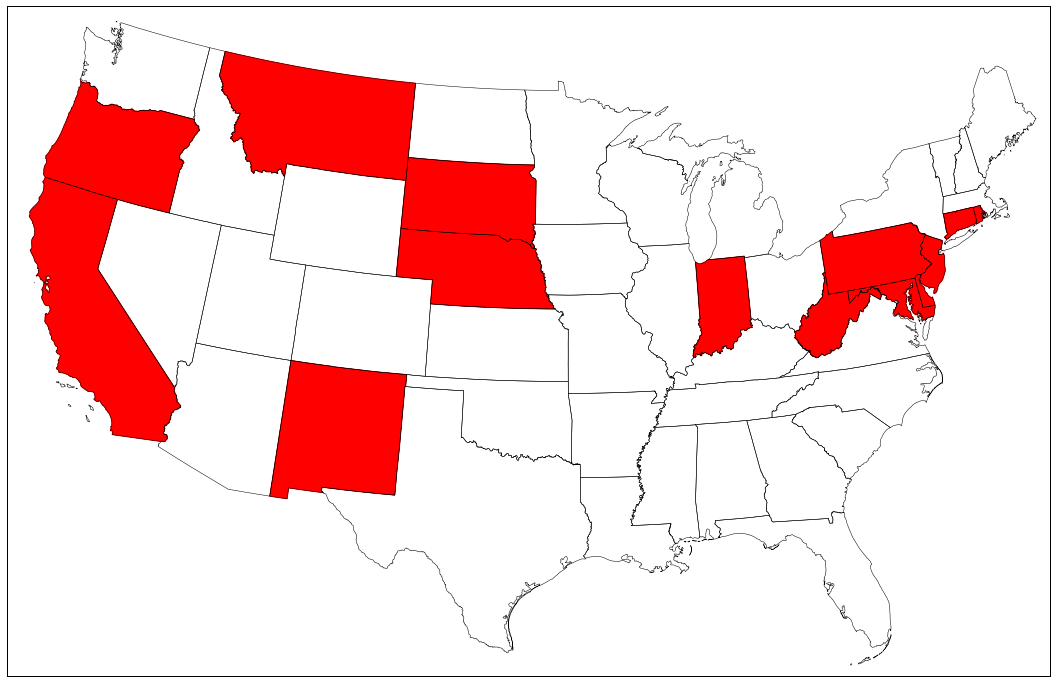

In [210]:
from matplotlib.patches import Polygon

# create the map
map = bmp.Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('state_shapes/st99_d00', name='states', color='black', drawbounds=True)

map.drawmapboundary(fill_color='white')
# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

color_dict = {
    'Sanders': 'teal',
    'Clinton': 'blue',
    'Trump': 'red',
    'Kasich': 'orange',
    'Cruz': 'purple',
}
for state in reppreds.keys():
    seg = map.states[state_names.index(state)]
    winner = reppreds[state]
    
    poly = Polygon(seg, facecolor=color_dict[winner], edgecolor=color_dict[winner])
    ax.add_patch(poly)


# get Texas and draw the filled polygon
# seg = map.states[state_names.index('Texas')]
# poly = Polygon(seg, facecolor='red',edgecolor='red')
# ax.add_patch(poly)

plt.show()

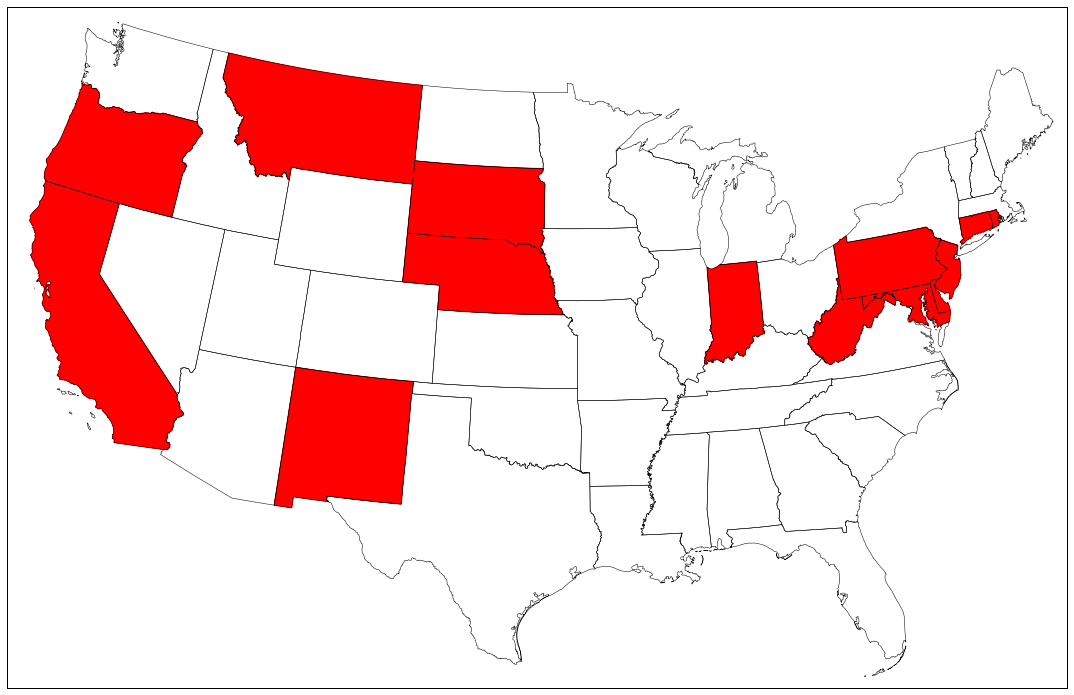

In [211]:
plt.figure(figsize=(19,20))

from matplotlib.patches import Polygon

# create the map
map = bmp.Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('state_shapes/st99_d00', name='states', color='black', drawbounds=True)

map.drawmapboundary(fill_color='white')
# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

color_dict = {
    'Sanders': 'teal',
    'Clinton': 'blue',
    'Trump': 'red',
    'Kasich': 'orange',
    'Cruz': 'purple',
}
for state in reppreds.keys():
    seg = map.states[state_names.index(state)]
    winner = repwins[state]
    
    poly = Polygon(seg, facecolor=color_dict[winner], edgecolor=color_dict[winner])
    ax.add_patch(poly)


# get Texas and draw the filled polygon
# seg = map.states[state_names.index('Texas')]
# poly = Polygon(seg, facecolor='red',edgecolor='red')
# ax.add_patch(poly)

plt.show()

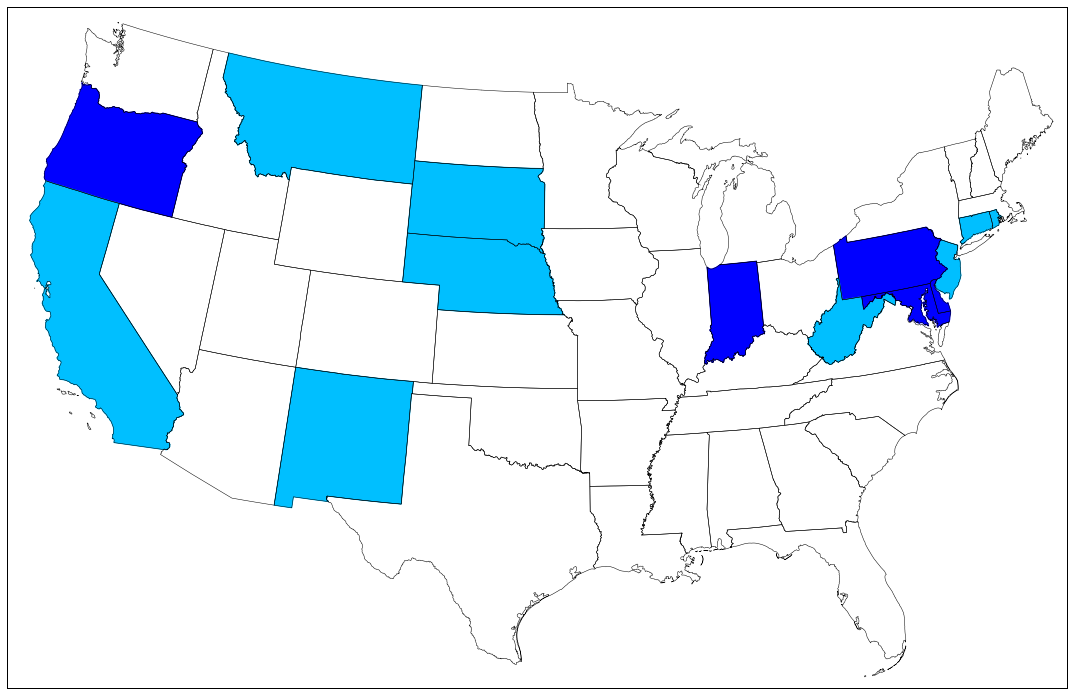

In [212]:
plt.figure(figsize=(19,20))

from matplotlib.patches import Polygon

# create the map
map = bmp.Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('state_shapes/st99_d00', name='states', color='black', drawbounds=True)

map.drawmapboundary(fill_color='white')
# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

color_dict = {
    'Sanders': 'deepskyblue',
    'Clinton': 'blue',
    'Trump': 'red',
    'Kasich': 'orange',
    'Cruz': 'purple',
}
for state in reppreds.keys():
    seg = map.states[state_names.index(state)]
    winner = dempreds[state]
    
    poly = Polygon(seg, facecolor=color_dict[winner], edgecolor=color_dict[winner])
    ax.add_patch(poly)


# get Texas and draw the filled polygon
# seg = map.states[state_names.index('Texas')]
# poly = Polygon(seg, facecolor='red',edgecolor='red')
# ax.add_patch(poly)

plt.show()

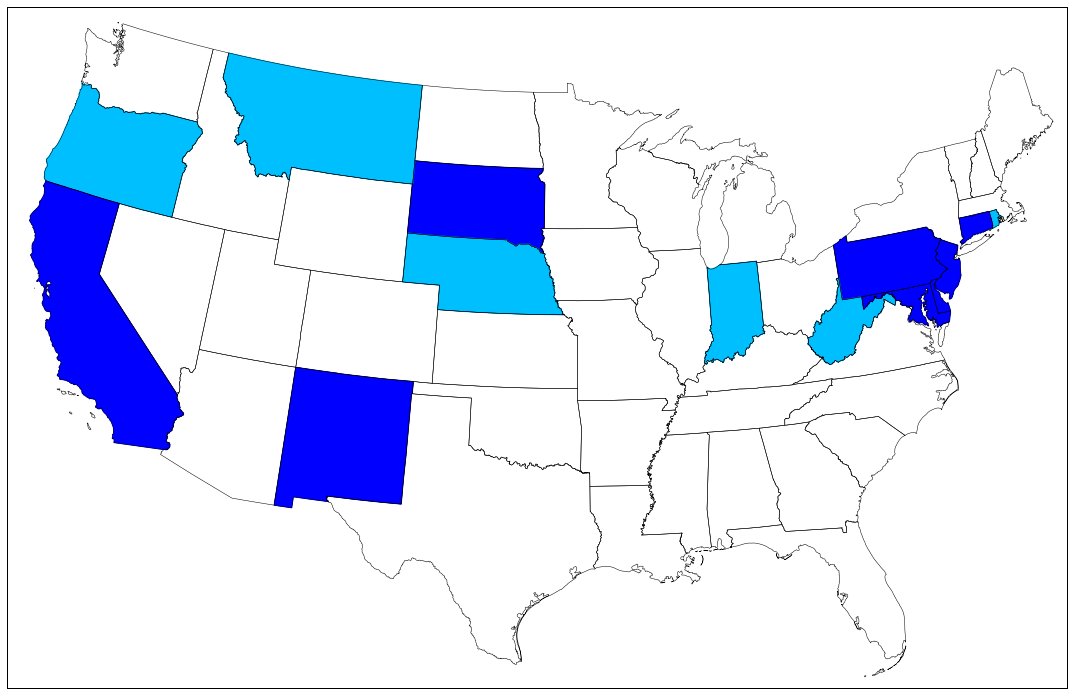

In [213]:
plt.figure(figsize=(19,20))

from matplotlib.patches import Polygon

# create the map
map = bmp.Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('state_shapes/st99_d00', name='states', color='black', drawbounds=True)

map.drawmapboundary(fill_color='white')
# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

color_dict = {
    'Sanders': 'deepskyblue',
    'Clinton': 'blue',
    'Trump': 'orange',
    'Kasich': 'red',
    'Cruz': 'purple',
}
for state in reppreds.keys():
    seg = map.states[state_names.index(state)]
    winner = demwins[state]
    
    poly = Polygon(seg, facecolor=color_dict[winner], edgecolor=color_dict[winner])
    ax.add_patch(poly)


# get Texas and draw the filled polygon
# seg = map.states[state_names.index('Texas')]
# poly = Polygon(seg, facecolor='red',edgecolor='red')
# ax.add_patch(poly)

plt.show()

In [173]:
for key in demwins.keys():
    print('%s  \tpred: %s\tactual: %s, %r' % (key, dempreds[key], demwins[key], dempreds[key] == demwins[key]))

South Dakota  	pred: Sanders	actual: Clinton, False
New Jersey  	pred: Sanders	actual: Clinton, False
Delaware  	pred: Clinton	actual: Clinton, True
Montana  	pred: Sanders	actual: Sanders, True
Oregon  	pred: Clinton	actual: Sanders, False
Rhode Island  	pred: Sanders	actual: Sanders, True
Pennsylvania  	pred: Clinton	actual: Clinton, True
Connecticut  	pred: Sanders	actual: Clinton, False
Nebraska  	pred: Sanders	actual: Sanders, True
California  	pred: Sanders	actual: Clinton, False
New Mexico  	pred: Sanders	actual: Clinton, False
West Virginia  	pred: Sanders	actual: Sanders, True
Indiana  	pred: Clinton	actual: Sanders, False
Maryland  	pred: Clinton	actual: Clinton, True


In [144]:
demwins

{'California': 'Clinton',
 'Connecticut': 'Clinton',
 'Delaware': 'Clinton',
 'Indiana': 'Sanders',
 'Maryland': 'Clinton',
 'Montana': 'Sanders',
 'Nebraska': 'Sanders',
 'New Jersey': 'Clinton',
 'New Mexico': 'Clinton',
 'Oregon': 'Sanders',
 'Pennsylvania': 'Clinton',
 'Rhode Island': 'Sanders',
 'South Dakota': 'Clinton',
 'West Virginia': 'Sanders'}

In [193]:
min(demmargins.values())

-0.37322449333102375

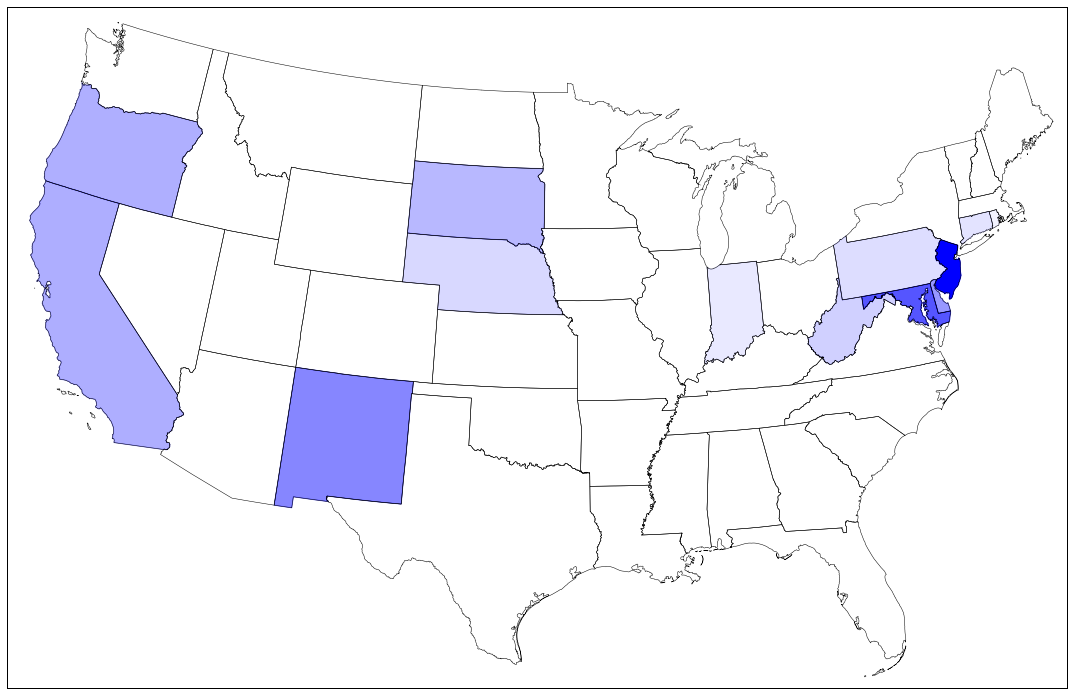

In [214]:
plt.figure(figsize=(19,20))

from matplotlib.patches import Polygon

# create the map
map = bmp.Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('state_shapes/st99_d00', name='states', color='black', drawbounds=True)

map.drawmapboundary(fill_color='white')
# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

color_dict = {
    'Sanders': 'deepskyblue',
    'Clinton': 'blue',
    'Trump': 'orange',
    'Kasich': 'red',
    'Cruz': 'purple',
}
for state in reppreds.keys():
    seg = map.states[state_names.index(state)]
    margin = (demmargins[state] - min(demmargins.values())) /(max(demmargins.values())-min(demmargins.values()))
    
    poly = Polygon(seg, facecolor=[0, 0, 1, margin], edgecolor=[0, 0, 1, margin])
    ax.add_patch(poly)


# get Texas and draw the filled polygon
# seg = map.states[state_names.index('Texas')]
# poly = Polygon(seg, facecolor='red',edgecolor='red')
# ax.add_patch(poly)

plt.show()

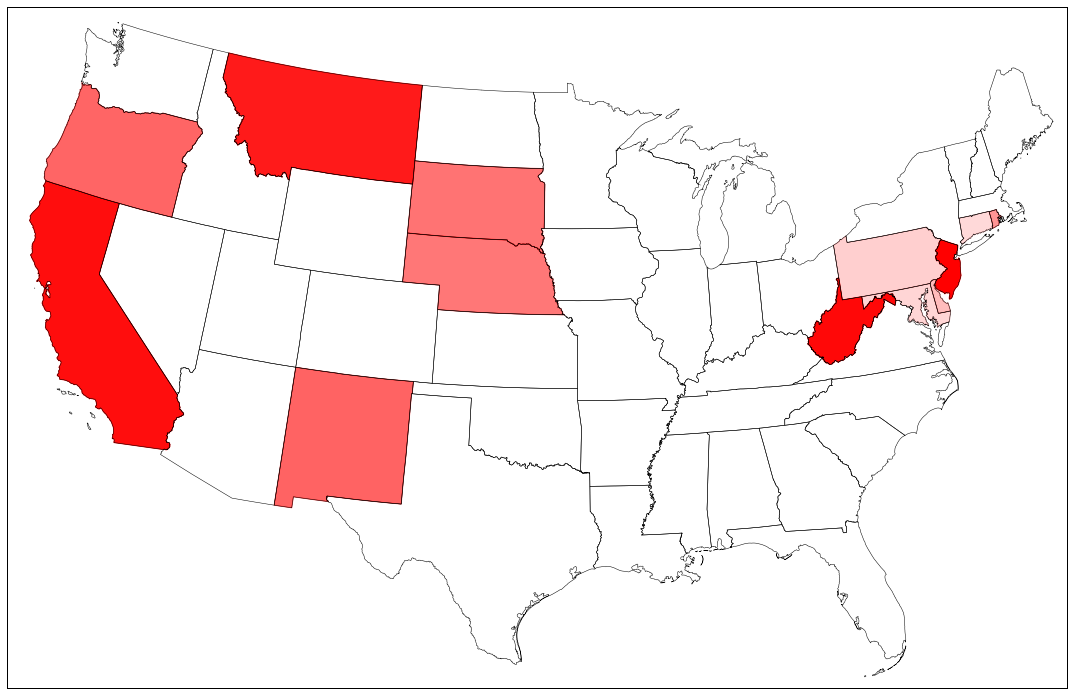

In [215]:
plt.figure(figsize=(19,20))

from matplotlib.patches import Polygon

# create the map
map = bmp.Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('state_shapes/st99_d00', name='states', color='black', drawbounds=True)

map.drawmapboundary(fill_color='white')
# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

color_dict = {
    'Sanders': 'deepskyblue',
    'Clinton': 'blue',
    'Trump': 'orange',
    'Kasich': 'red',
    'Cruz': 'purple',
}
for state in reppreds.keys():
    seg = map.states[state_names.index(state)]
    margin = (repmargins[state] - min(repmargins.values()))/(max(repmargins.values())-min(repmargins.values()))

    
    poly = Polygon(seg, facecolor=[1, 0, 0, margin], edgecolor=[1, 0, 0, margin])
    ax.add_patch(poly)


# get Texas and draw the filled polygon
# seg = map.states[state_names.index('Texas')]
# poly = Polygon(seg, facecolor='red',edgecolor='red')
# ax.add_patch(poly)

plt.show()